<a href="https://colab.research.google.com/github/VamshiBolukonda/2216120_AIML_Bootcamp/blob/main/LinearRegressionUsingGradientDescentOptimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#creating a Empty dataframe
import pandas as pd
df=pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [13]:
#initialize list elements
data=[0.2,0.4,0.6,0.8]
df=pd.DataFrame(data,columns=['Bactria_size'])
df['Max_growth']=[3.4,3.8,4.2,4.6]
df

,Bactria_size,Max_growth
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


In [14]:
#splitting the data
x_train=df.iloc[:3,:-1]
y_train=df.iloc[:3,-1:]
x_test=df.iloc[3:,:-1]
y_test=df.iloc[3:,-1:]
x_train

,Bactria_size
0,0.2
1,0.4
2,0.6


In [15]:
y_train

,Max_growth
0,3.4
1,3.8
2,4.2


In [16]:
x_test

,Bactria_size
3,0.8


In [17]:
y_test

,Max_growth
3,4.6


In [18]:
import sympy as sym
from sympy import *
#Training the Simple Linear Regression Model on Training Set
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
#step1:Initialize model parameters
mi=1
ci=-1
n=0.1#Learning Rate
epochs=50#No. of iterations
iter=1#Initial
ns=len(x_train)
y=1
m=1
x=1
c=1
#step2:start iteration
for iter in range(1,epochs+1):
  print("ITERATION : {}".format(iter))
  print("+++++++++++++++++++++++++++++")
  #step3:Track Sample
  for sample in range(0,ns):
    xa=x_train['Bactria_size'][sample]
    ya=y_train['Max_growth'][sample]
    print("---->Sample {}".format(sample+1)+" x={}".format(xa)+" y={}".format(ya))
    #Step 4: Calculate the Gradient
    E=(0.5)*(y-m*x-c)**2 #Error Function
    x=sym.Symbol('x') #It denotes symbol in above error function and helpful in substitution
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')
    #Calculating Gradient Eq using Sympy Module
    deltaE_m=sym.diff(E,m)
    deltaE_c=sym.diff(E,c)

    #Substituting Values
    deltaE_m=deltaE_m.subs(m,mi)
    deltaE_m=deltaE_m.subs(c,ci)
    deltaE_m=deltaE_m.subs(x,xa)
    deltaE_m=deltaE_m.subs(y,ya)

    deltaE_c=deltaE_c.subs(m,mi)
    deltaE_c=deltaE_c.subs(c,ci)
    deltaE_c=deltaE_c.subs(x,xa)
    deltaE_c=deltaE_c.subs(y,ya)

    print("Obtained Gradient wrto m and c :")
    print('deltaE_m: ',deltaE_m)
    print('deltaE_c: ',deltaE_c)

    #Step 5: Calculate the Step Length - Change

    del_m=-n*deltaE_m
    del_c=-n*deltaE_c

    #Step 6: Updating the Model Parameters
    mi=mi+del_m
    ci=ci+del_c
    print("m : {}".format(mi)+" c : {}".format(ci))
print("--------------------------------------------")
print("Optimal Values")
print("m = {}".format(mi))
print("c = {}".format(ci))

ITERATION : 1
+++++++++++++++++++++++++++++
---->Sample 1 x=0.2 y=3.4
Obtained Gradient wrto m and c :
deltaE_m:  0
deltaE_c:  0
m : 1 c : -1
---->Sample 2 x=0.4 y=3.8
Obtained Gradient wrto m and c :
deltaE_m:  -1.76000000000000
deltaE_c:  -4.40000000000000
m : 1.17600000000000 c : -0.560000000000000
---->Sample 3 x=0.6 y=4.2
Obtained Gradient wrto m and c :
deltaE_m:  -2.43264000000000
deltaE_c:  -4.05440000000000
m : 1.41926400000000 c : -0.154560000000000
ITERATION : 2
+++++++++++++++++++++++++++++
---->Sample 1 x=0.2 y=3.4
Obtained Gradient wrto m and c :
deltaE_m:  -0.654141440000000
deltaE_c:  -3.27070720000000
m : 1.48467814400000 c : 0.172510720000000
---->Sample 2 x=0.4 y=3.8
Obtained Gradient wrto m and c :
deltaE_m:  -1.21344720896000
deltaE_c:  -3.03361802240000
m : 1.60602286489600 c : 0.475872522240000
---->Sample 3 x=0.6 y=4.2
Obtained Gradient wrto m and c :
deltaE_m:  -1.65630825529344
deltaE_c:  -2.76051375882240
m : 1.77165369042534 c : 0.751923898122240
ITERATION :

In [24]:
y_train

,Max_growth
0,3.4
1,3.8
2,4.2


In [26]:
#y=2.39x+2.83
y_train_pred=[]
for i in range(0,len(x_train)):
  y_cal=mi*x_train['Bactria_size'][i]+ci
  y_train_pred.append(y_cal)
y_train_pred

[3.30995852805404, 3.78924952867145, 4.26854052928887]

In [27]:
x_train_list=list(x_train['Bactria_size'])
x_train_list

[0.2, 0.4, 0.6]

In [28]:
y_train_list=list(y_train['Max_growth'])
y_train_list

[3.4, 3.8, 4.2]

In [29]:
error=[]
for i in range(0,len(x_train)):
  err=(y_train_list[i]-y_train_pred[i])
  error.append(err)
error

[0.0900414719459586, 0.0107504713285453, -0.0685405292888674]

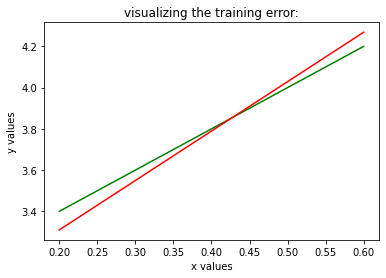

In [30]:
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_actual',color='green')
plt.plot(x_train_list,y_train_pred,label='y_predicted',color='red')


#Add labels and title
plt.title("visualizing the training error:")
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()